<a href="https://colab.research.google.com/github/brendanpshea/data-science/blob/main/DataScience_10_DataDashboards.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualizations and Dashboarding
### Brendan Shea, PhD


**Why Does Data Visualization Matter for a Snack Empire?**

In the world of business, the ability to make informed decisions depends on the clarity of the information available. **Data visualization** refers to the graphical representation of information and data using visual elements such as charts, graphs, and maps. Visualization transforms raw data into a form that is easier to interpret, highlighting patterns, trends, and anomalies that might remain hidden in rows and columns of numbers. For our company, Retro Snacks Co., this means leveraging visualization to understand the performance of snacks like *Groovy Gushers* and *Neon Nachos*. The stakes are high: the better we understand our sales data, customer preferences, and market dynamics, the more effectively we can target our advertising and optimize our snack offerings.

The importance of visualization is not simply about aesthetics. **Cognitive load**, the mental effort required to process information, is significantly reduced when data is presented visually. Human brains are wired to process visual input faster than textual or numerical information. For example, spotting a downward trend in sales for *Radical Ranchers* is almost instantaneous when represented in a line graph, whereas the same insight might take minutes to discern from a table of numbers. Good visualizations don’t just present data; they tell a **data story**, a narrative that guides viewers toward understanding key insights and making decisions based on evidence.

Visualization also facilitates communication. For stakeholders like our marketing team, investors, or even snack-enthusiastic customers, well-designed charts and dashboards convey the health of our business at a glance. They can reveal whether *Disco Dips* are resonating with the Gen Z crowd or if our nostalgic branding is more effective with older demographics. Internally, visualization supports our team in identifying inefficiencies in production, uncovering regional variations in sales, and predicting the success of our next big product line: *Psychedelic Pretzels*.

To begin our journey into visualization, we need data. A **tidy dataframe**—a structured table where each row represents an observation and each column a variable—is essential for most visualization tools. Below is a Python script that generates a dataset for Retro Snacks Co., capturing data like product names, sales volumes, regions, customer ratings, and dates. This dataframe will power our visualizations throughout the chapter.

(Note: Please "run" the following to create the dataframe).

In [1]:
# @title
import pandas as pd
import numpy as np
import random

# Seed for reproducibility
np.random.seed(42)

# Constants
products = ['Groovy Gushers', 'Radical Ranchers', 'Neon Nachos', 'Far-Out Fudge', 'Disco Dips', 'Psychedelic Pretzels']
regions = ['West Coast', 'Midwest', 'East Coast', 'South']
channels = ['Online', 'Retail', 'Wholesale']
dates = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')

# Define product-specific attributes
product_attributes = {
    'Groovy Gushers': {'popularity': 1.2, 'rating': 4.8, 'profit_margin': 35},
    'Radical Ranchers': {'popularity': 1.5, 'rating': 4.5, 'profit_margin': 28},
    'Neon Nachos': {'popularity': 1.0, 'rating': 4.7, 'profit_margin': 32},
    'Far-Out Fudge': {'popularity': 0.8, 'rating': 2.5, 'profit_margin': 40},
    'Disco Dips': {'popularity': 0.9, 'rating': 3.6, 'profit_margin': 30},
    'Psychedelic Pretzels': {'popularity': 1.1, 'rating': 3.4, 'profit_margin': 25}
}

# Generate correlated data
data = []
for _ in range(1000):
    product = random.choice(products)
    attributes = product_attributes[product]

    base_sales = np.random.lognormal(mean=3, sigma=0.5) * attributes['popularity']  # Scale by product popularity
    customer_rating = np.clip(attributes['rating'] + np.random.normal(0, 0.2), 2.5, 5.0)  # Add variation to base rating
    marketing_spend = base_sales * np.random.uniform(0.1, 0.3)  # Correlated with sales
    profit_margin = max(10, min(50, np.random.normal(attributes['profit_margin'], 5)))  # Constrain to range [10, 50]

    data.append({
        'Date': np.random.choice(dates),
        'Product': product,
        'Region': random.choice(regions),
        'Sales Volume': int(base_sales),
        'Customer Rating': round(customer_rating, 1),
        'Marketing Spend ($)': round(marketing_spend, 2),
        'Sales Channel': random.choice(channels),
        'Profit Margin (%)': round(profit_margin, 1)
    })

# Create dataframe
df = pd.DataFrame(data)

# Ensure the dataframe is tidy
df = df.sort_values('Date').reset_index(drop=True)

# Save to CSV for reuse
df.to_csv('enhanced_retro_snacks_data_v2.csv', index=False)


In [2]:
# Display the first few rows -- make sure to run the above cell first
df.head()


,Date,Product,Region,Sales Volume,Customer Rating,Marketing Spend ($),Sales Channel,Profit Margin (%)
0,2024-01-01,Far-Out Fudge,Midwest,10,2.5,2.47,Wholesale,33.3
1,2024-01-01,Groovy Gushers,Midwest,16,4.9,3.39,Online,30.9
2,2024-01-01,Psychedelic Pretzels,East Coast,17,3.4,2.33,Wholesale,21.5
3,2024-01-03,Far-Out Fudge,South,17,2.5,2.76,Online,34.9
4,2024-01-03,Disco Dips,West Coast,10,3.8,1.37,Wholesale,29.0


In [3]:
df.describe().round(2)

,Date,Sales Volume,Customer Rating,Marketing Spend ($),Profit Margin (%)
count,1000,1000.00,1000.00,1000.00,1000.00
mean,2024-07-02 22:17:45.600000,24.09,3.96,4.95,31.61
min,2024-01-01 00:00:00,3.00,2.50,0.35,10.00
25%,2024-04-03 00:00:00,14.00,3.40,2.72,26.40
50%,2024-06-30 00:00:00,21.00,4.30,4.09,31.40
75%,2024-10-06 00:00:00,31.00,4.70,6.34,36.20
max,2024-12-31 00:00:00,108.00,5.00,28.21,50.00
std,NaN,13.65,0.81,3.27,7.10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 1000 non-null   datetime64[ns]
 1   Product              1000 non-null   object        
 2   Region               1000 non-null   object        
 3   Sales Volume         1000 non-null   int64         
 4   Customer Rating      1000 non-null   float64       
 5   Marketing Spend ($)  1000 non-null   float64       
 6   Sales Channel        1000 non-null   object        
 7   Profit Margin (%)    1000 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 62.6+ KB


This dataset is rich with storytelling opportunities. For example, a scatter plot could illustrate the tradeoff between high sales and declining customer ratings, while a bar chart might reveal which sales channels dominate for each product. Over time, line graphs can track how *Disco Dips* perform across regions, or how marketing spend correlates with spikes in sales for *Groovy Gushers*. By embedding these features into our dataset, we ensure that the visualizations we create later in this chapter are both realistic and compelling.

## Brendan's Lecture

In [ ]:
##Click here to launch my lecture
from IPython.display import YouTubeVideo
YouTubeVideo('bzq1XgFL7LI', width=800, height=500)

## What Stories Can Data Tell Us About Our Outrageous Snacks?

At its heart, **data visualization** is a storytelling tool. Each chart or graph has the potential to illuminate hidden truths within the data, connecting patterns and trends to actionable insights. For Retro Snacks Co., the data stories we uncover could shape the trajectory of our business. Is the *West Coast* truly the land of *Groovy Gushers*, or is another region on the rise? Are *Psychedelic Pretzels* eating into *Neon Nachos'* market share? Through well-crafted visualizations, we can explore these questions, peeling back layers of complexity to reveal a vivid narrative about our snacks.

Visualizations provide answers to three types of questions: **descriptive**, **diagnostic**, and **predictive**. Descriptive visualizations, such as bar charts and pie charts, help us understand the current state of affairs—what our sales look like, where they are strongest, and who our best customers are. Diagnostic visualizations, including scatter plots and box plots, dig deeper into relationships, correlations, and outliers, helping us understand why our sales look the way they do. Predictive visualizations, like trendlines or forecast models, push us into the future, suggesting what could happen next based on historical patterns.

### Types of Stories in Our Data

1. **Product Performance**: Which snacks are flying off the shelves, and which ones are lagging? Visualizing **sales volume** and **profit margin** side by side can uncover high-volume, low-profit products that might need rethinking. Similarly, trends over time might show if *Radical Ranchers* have staying power or if their popularity was just a short-lived fad.

2. **Regional Preferences**: Different regions may have distinct tastes. A **choropleth map** showing sales by region could reveal that *Far-Out Fudge* dominates the Midwest, while *Disco Dips* rule the South. Visualizing **customer ratings** geographically can also provide insight into where our branding and flavor profiles resonate most strongly.

3. **Marketing Impact**: Are our marketing dollars making a difference? A **scatter plot** comparing **marketing spend** and **sales volume** could reveal whether our investments are paying off or if there’s room to optimize. Highlighting this correlation can help us make more strategic decisions about where to allocate funds.

4. **Customer Satisfaction**: Ratings often tell the unvarnished truth about a product. Using **box plots**, we can compare the distribution of **customer ratings** across products, spotting high-performing snacks and identifying opportunities for improvement.

5. **Channel Dynamics**: Which sales channels are most effective? By visualizing sales and profit by channel (e.g., **stacked bar charts**), we might discover that *Neon Nachos* thrive in retail stores, while *Groovy Gushers* perform best online. Understanding these dynamics can help us optimize inventory and promotions.

### Examples of Questions to Explore

Let’s tie these ideas to some examples of concrete questions that will guide the visualizations in this chapter:
- How do the sales trends for *Groovy Gushers* compare to *Neon Nachos* over the past year?  
- Which region is contributing the highest revenue for *Disco Dips*?  
- Is there a significant relationship between customer ratings and sales volume?  
- Are wholesale customers more profitable than online or retail customers?  
- Do any products show consistently high ratings, low sales, and high profit margins, suggesting untapped potential?

Below, we preview our dataset to ground these questions in our actual data:

In [5]:
# Summarizing key statistics for a quick overview
summary = df.groupby('Product').agg({
    'Sales Volume': ['mean', 'sum'],
    'Customer Rating': 'mean',
    'Profit Margin (%)': 'mean'
}).reset_index()

# Renaming columns for clarity
summary.columns = ['Product', 'Average Sales Volume', 'Total Sales Volume', 'Average Customer Rating', 'Average Profit Margin']

summary.round(2)

,Product,Average Sales Volume,Total Sales Volume,Average Customer Rating,Average Profit Margin
0,Disco Dips,18.80,2669,3.59,29.90
1,Far-Out Fudge,17.67,2686,2.58,40.62
2,Groovy Gushers,26.17,4710,4.77,34.87
3,Neon Nachos,22.79,3556,4.71,31.97
4,Psychedelic Pretzels,25.17,4455,3.39,25.21
5,Radical Ranchers,31.15,6011,4.49,28.32


### What This Preview Tells Us

The summary table provides a snapshot of how our products are performing. From here, we can see which products are contributing the most to total sales, which have the highest ratings, and which offer the best profit margins. These metrics will help us prioritize the visualizations we create in the next sections, focusing on stories that are not only compelling but also critical to Retro Snacks Co.’s success.

## How Do We Choose the Right Visualization for Our Data?

The power of data visualization lies not only in its ability to present information but also in choosing the most appropriate visual form for the story you want to tell. The type of chart or graph you select should match the nature of your data and the question you’re trying to answer. For Retro Snacks Co., a line graph might help track the rise of *Groovy Gushers* over time, while a bar chart could highlight which region loves *Far-Out Fudge* the most. Choosing the wrong visualization, however, can obscure patterns or mislead stakeholders, leading to poor decisions.

### Key Factors to Consider When Choosing a Visualization

1. **Purpose of the Visualization**:  
   Visualizations generally fall into one of four categories based on purpose:  
   - **Comparison**: Highlight differences between categories (e.g., bar charts for comparing total sales by product).  
   - **Relationship**: Show correlations or connections between variables (e.g., scatter plots for marketing spend versus sales volume).  
   - **Distribution**: Reveal patterns in data spread (e.g., histograms for analyzing the distribution of profit margins).  
   - **Composition**: Break down parts of a whole (e.g., pie charts for sales channel contributions).  

2. **Type of Data**:  
   Data can be **categorical** (e.g., product names, regions), **quantitative** (e.g., sales volume, profit margin), or **temporal** (e.g., date). Different data types lend themselves to specific visualizations:
   - Categorical data pairs well with bar charts, stacked bar charts, or pie charts.
   - Quantitative data can be visualized with line graphs, scatter plots, or histograms.
   - Temporal data often benefits from time-series visualizations like line graphs.

In this chapter, we'll be using the **Plotly** library, which specializes in creating interactive visualizations of the sort that often power websites and data **dashboards** (more on these later!).

### Examples of Choosing the Right Visualization

Consider the following examples from Retro Snacks Co.’s data:

**Example 1: Comparing Sales Across Products**  
To identify which snacks are performing best, we need a chart that compares products. A **bar chart** works well here because it clearly ranks sales by category. Below is a Plotly implementation for total sales volume by product.


In [6]:
import plotly.express as px

# Total sales by product
total_sales = df.groupby('Product')['Sales Volume'].sum().reset_index()

# Create bar chart
fig = px.bar(
    total_sales,
    x='Sales Volume',
    y='Product',
    orientation='h',
    title='Total Sales Volume by Product',
    labels={'Sales Volume': 'Total Sales Volume', 'Product': 'Product'},
    text='Sales Volume'
)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(yaxis=dict(categoryorder='total ascending'))
fig.show()

This interactive chart allows users to hover over bars for exact sales figures, making it ideal for stakeholder presentations.


**Example 2: Analyzing Regional Preferences**  
If we want to know where *Neon Nachos* are most popular, a **heatmap** or **choropleth map** is an excellent choice. Plotly simplifies this process with its `choropleth` function.

In [7]:

# Total sales by region for Neon Nachos
region_sales = df[df['Product'] == 'Neon Nachos'].groupby('Region')['Sales Volume'].sum().reset_index()

# Map region names to a standard format for US state mapping
region_mapping = {
    'West Coast': 'CA',
    'Midwest': 'MN',
    'East Coast': 'NY',
    'South': 'TX'
}
region_sales['State'] = region_sales['Region'].map(region_mapping)

fig = px.choropleth(
    region_sales,
    locations='State',
    locationmode='USA-states',
    color='Sales Volume',
    scope='usa',
    title='Neon Nachos Sales by Region'
)
fig.show()

**Example 3: Correlation Between Marketing Spend and Sales Volume**  
To assess whether increased marketing spend correlates with higher sales, we would use a **scatter plot**. This type of chart is ideal for showing relationships between two quantitative variables.


In [8]:
# Scatter plot for marketing spend vs. sales volume
df_sample = df.sample(200)  # Reduce to 200 points for clarity

fig = px.scatter(
    df_sample,
    x='Marketing Spend ($)',
    y='Sales Volume',
    color='Product',
    title='Marketing Spend vs Sales Volume',
    labels={'Marketing Spend ($)': 'Marketing Spend ($)', 'Sales Volume': 'Sales Volume'}
)
fig.update_traces(marker=dict(size=8, opacity=0.7))
fig.show()



**Example 4: Tracking Trends Over Time**  
For temporal data, such as tracking *Radical Ranchers* sales over the year, a **line graph** is the natural choice. Plotly makes it easy to add interactivity to these visualizations.


In [9]:
# Line graph for sales over time
time_series = df[df['Product'] == 'Radical Ranchers'].groupby('Date')['Sales Volume'].sum().reset_index()

fig = px.line(
    time_series,
    x='Date',
    y='Sales Volume',
    title='Radical Ranchers Sales Over Time',
    labels={'Date': 'Date', 'Sales Volume': 'Total Sales Volume'}
)
fig.show()

## Other Types of Visualizations
Let's take a look at a few other common (and not-so-common visualizations) we can create with Plotly.

### Histogram for Distributions
**Use Case:** Analyze the distribution of a single variable, such as profit margins or customer ratings.  

Histograms help you understand the frequency and spread of data. For example, let’s look at the distribution of **Profit Margins** across all products.


In [10]:
fig_hist = px.histogram(
    df,
    x='Profit Margin (%)',
    title='Distribution of Profit Margins',
    labels={'Profit Margin (%)': 'Profit Margin (%)'},
    nbins=20,
    color_discrete_sequence=['blue']
)
fig_hist.update_layout(yaxis_title='Count')
fig_hist.show()

### Box Plot for Comparisons of Distributions
**Use Case:** Compare the spread and outliers of a variable across multiple categories.  

Box plots are great for comparing distributions across products, like **Customer Ratings** for all snack types.

In [11]:
fig_box = px.box(
    df,
    x='Product',
    y='Customer Rating',
    title='Customer Ratings by Product',
    labels={'Customer Rating': 'Customer Rating', 'Product': 'Product'},
    color='Product'
)
fig_box.show()


This visualization highlights not only the average ratings but also variability and potential outliers.


### Pie Chart for Proportions
**Use Case:** Show the relative proportions of a whole, such as the share of total sales by region or sales channel.  

Here’s a pie chart for the **Sales Channels** used by customers:



In [12]:
fig_pie = px.pie(
    df,
    names='Sales Channel',
    values='Sales Volume',
    title='Sales by Channel',
    labels={'Sales Channel': 'Sales Channel', 'Sales Volume': 'Sales Volume'}
)
fig_pie.update_traces(textinfo='percent+label')
fig_pie.show()

### Sunburst Chart for Hierarchical Data
**Use Case:** Visualize nested or hierarchical data, such as sales broken down by region and then by product.  

A sunburst chart can illustrate how different products perform in each region:

In [13]:
fig_sunburst = px.sunburst(
    df,
    path=['Region', 'Product'],
    values='Sales Volume',
    title='Sales Breakdown by Region and Product',
    labels={'Region': 'Region', 'Product': 'Product'}
)
fig_sunburst.show()

### Heatmap for Relationships in Large Data  
**Use Case:** Display the relationship between two variables across a grid, like sales volume over time by region.  

Here’s a heatmap showing **Daily Sales by Region**:

In [14]:
heatmap_data = df.groupby(['Date', 'Region'])['Sales Volume'].sum().reset_index()

fig_heatmap = px.density_heatmap(
    heatmap_data,
    x='Date',
    y='Region',
    z='Sales Volume',
    title='Daily Sales by Region',
    labels={'Date': 'Date', 'Region': 'Region', 'Sales Volume': 'Sales Volume'},
    color_continuous_scale='Viridis'
)
fig_heatmap.show()


### Treemap for Hierarchical Composition
**Use Case:** Show proportions within hierarchical data with an emphasis on comparison.  

A treemap is similar to a sunburst chart but uses rectangles instead of radial sections. For example, sales broken down by **Region** and **Product**:


In [15]:
fig_treemap = px.treemap(
    df,
    path=['Region', 'Product'],
    values='Sales Volume',
    title='Treemap of Sales by Region and Product'
)
fig_treemap.show()

### Funnel Chart for Sequential Data
**Use Case:** Show the stages of a process or flow, like sales through different channels.  

For example, imagine sales funneled through **Online, Retail, and Wholesale** channels:

In [16]:
channel_funnel = df.groupby('Sales Channel')['Sales Volume'].sum().reset_index()

fig_funnel = px.funnel(
    channel_funnel,
    x='Sales Volume',
    y='Sales Channel',
    title='Sales Funnel by Channel',
    labels={'Sales Volume': 'Sales Volume', 'Sales Channel': 'Sales Channel'}
)
fig_funnel.show()

### Animated Charts for Temporal Comparisons
**Use Case:** Show changes over time dynamically, like how sales of different products evolve.  

An animated bar race chart is great for showcasing how product sales change over the year:


In [17]:
fig_animated = px.bar(
    df,
    x='Sales Volume',
    y='Product',
    color='Product',
    animation_frame='Date',
    title='Sales Over Time by Product',
    labels={'Sales Volume': 'Sales Volume', 'Product': 'Product'}
)
fig_animated.show()


### Bubble Chart for Multi-Dimensional Relationships
**Use Case:** Represent relationships among three or more variables by encoding data as the size, position, and color of bubbles.

Here’s an example showing how **Sales Volume**, **Profit Margin**, and **Customer Ratings** interact:


In [18]:
# Bubble chart for Sales Volume, Profit Margin, and Customer Rating
fig_bubble = px.scatter(
    df,
    x='Sales Volume',
    y='Profit Margin (%)',
    size='Customer Rating',
    color='Product',
    title='Bubble Chart: Sales vs. Profit Margin by Product',
    labels={'Sales Volume': 'Sales Volume', 'Profit Margin (%)': 'Profit Margin (%)'},
    hover_name='Product',
    size_max=20
)
fig_bubble.show()

This visualization highlights products with high sales, profit margins, and customer ratings, offering a quick way to identify outliers.


### Waterfall Chart for Contribution Analysis
**Use Case:** Show incremental changes that contribute to a total, such as regional contributions to revenue.

Let’s break down **Total Revenue** by **Region**:


In [19]:
import plotly.graph_objects as go

# Revenue by region
region_revenue = df.groupby('Region')['Sales Volume'].sum().reset_index()
region_revenue['Sales Volume'] = region_revenue['Sales Volume'].astype(int)

# Adding an initial point for total and creating a waterfall structure
waterfall_data = [
    go.Waterfall(
        x=region_revenue['Region'],
        y=region_revenue['Sales Volume'],
        connector=dict(line=dict(color="rgba(63, 63, 63, 0.7)")),
        textposition="outside",
        texttemplate="%{y}"
    )
]

fig_waterfall = go.Figure(data=waterfall_data)
fig_waterfall.update_layout(
    title="Regional Contributions to Total Sales",
    xaxis_title="Region",
    yaxis_title="Sales Volume"
)
fig_waterfall.show()

### Infographic for KPIs and Storytelling
**Use Case:** Combine charts, text, and visuals to create a custom dashboard-like visualization for storytelling.

Using Plotly’s `subplot` module, we can arrange charts to create an infographic summarizing KPIs for product performance:


In [20]:
from plotly.subplots import make_subplots

# Prepare data for KPIs
kpi_data = df.groupby('Product').agg({
    'Sales Volume': 'sum',
    'Profit Margin (%)': 'mean',
    'Customer Rating': 'mean'
}).reset_index()

# Creating a subplot layout
fig_infographic = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Total Sales by Product", "Average Profit Margin by Product"),
    specs=[[{"type": "bar"}, {"type": "pie"}]]
)

# Adding a bar chart for total sales
fig_infographic.add_trace(
    go.Bar(
        x=kpi_data['Product'],
        y=kpi_data['Sales Volume'],
        name="Total Sales"
    ),
    row=1, col=1
)

# Adding a pie chart for profit margin distribution
fig_infographic.add_trace(
    go.Pie(
        labels=kpi_data['Product'],
        values=kpi_data['Profit Margin (%)'],
        name="Profit Margin"
    ),
    row=1, col=2
)

fig_infographic.update_layout(title="Infographic: Product Performance")
fig_infographic.show()


### Word Cloud for Text Data
**Use Case:** Summarize textual data visually by displaying frequently occurring words in customer reviews or feedback.

For word clouds, we use the `wordcloud` library. Let’s analyze customer reviews for *Far-Out Fudge*:


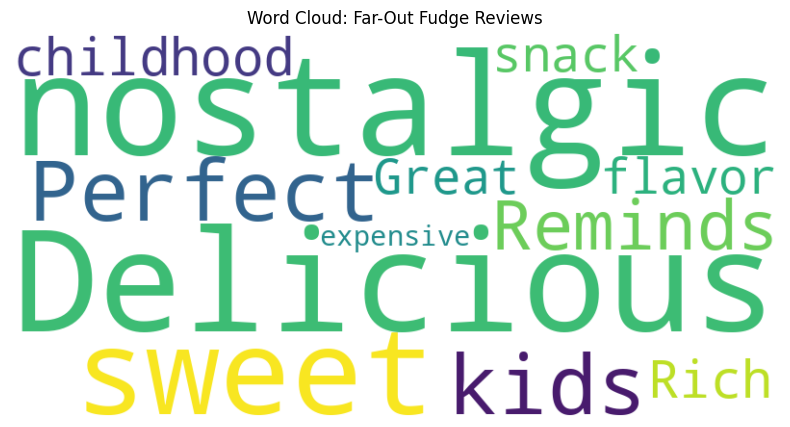

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Example customer reviews (replace with actual text data if available)
reviews = [
    "Delicious and nostalgic!", "Too sweet for me", "Perfect for kids",
    "Reminds me of my childhood", "Rich flavor", "Great snack!", "Too expensive"
]
text = " ".join(reviews)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud: Far-Out Fudge Reviews")
plt.show()


This visualization offers qualitative insights into customer sentiment and feedback.

### Summary of Chart Types and Uses
| Chart Type          | Use Case                                               | Example Use at Retro Snacks Co.                   |
|---------------------|--------------------------------------------------------|--------------------------------------------------|
| Line Chart          | Trends over time                                       | Daily sales trends for *Radical Ranchers*.       |
| Bar Chart           | Categorical comparisons                                | Total sales by region.                           |
| Scatter Plot        | Relationships between two numerical variables          | Marketing spend vs. sales volume.               |
| Bubble Chart        | Multi-dimensional relationships                        | Sales, profit margins, and customer ratings.     |
| Histogram           | Distribution of a single variable                      | Profit margins for all products.                |
| Box Plot            | Compare distributions across categories                | Customer ratings by product.                    |
| Pie Chart           | Proportions of a whole                                 | Sales share by channel.                         |
| Sunburst Chart      | Nested hierarchical relationships                      | Sales by region and product.                    |
| Heatmap             | Relationships across a grid                            | Daily sales volume by region.                   |
| Treemap             | Nested proportions with emphasis on comparison         | Regional sales broken down by product.          |
| Funnel Chart        | Sequential data                                        | Sales through online, retail, and wholesale.    |
| Waterfall Chart     | Breakdown of contributions to a total                  | Contribution of regions to total revenue.       |
| Infographic         | Custom visual storytelling                             | Displaying KPIs for product performance.        |
| Word Cloud          | Textual data visualization                             | Customer reviews for *Far-Out Fudge*.           |
| Animated Chart      | Dynamic changes over time                              | Animated product sales over the year.           |

### Graphic: CHoosing a Chart

In [22]:
# @title
import base64
from IPython.display import Image, display
import matplotlib.pyplot as plt

def mm(graph, width=1000, height=700):  # Add default dimensions
    graphbytes = graph.encode("utf8")
    base64_bytes = base64.urlsafe_b64encode(graphbytes)
    base64_string = base64_bytes.decode("ascii")
    # Add width and height parameters to the URL
    url = f"https://mermaid.ink/img/{base64_string}?width={width}&height={height}"
    display(Image(url=url))

mm("""
flowchart TD
    A[Start] --> B{What is the purpose of the visualization?}
    B --> C[Show trends over time]
    B --> D[Compare categories]
    B --> E[Show relationships between variables]
    B --> F[Show parts of a whole]
    B --> G[Analyze distribution]
    B --> H[Visualize hierarchical data]
    C --> I[Use a Line Chart]
    D --> J[Use a Bar Chart]
    E --> K[Use a Scatter Plot or Bubble Chart]
    F --> L[Use a Pie Chart, Sunburst, or Treemap]
    G --> M[Use a Histogram]
    H --> N[Use a Treemap or Sunburst]
    J --> O[Consider a Stacked Bar Chart if categories are hierarchical]
    K --> P[If size matters, use a Bubble Chart]

""")

## What Makes a Good Chart (and What Makes a Bad One)?

Creating effective visualizations is both an art and a science. While a well-designed chart can illuminate key insights and engage viewers, a poorly executed one can obscure data or even mislead decision-makers. For Retro Snacks Co., where we rely on visualizations to identify trends, optimize marketing, and understand customer preferences, getting the fundamentals right is crucial.

### Principles of Good Chart Design

1. **Clarity and Simplicity**:  
   A good chart communicates its message instantly and clearly. Avoid unnecessary embellishments like 3D effects or overly complex designs that detract from readability. Simplicity ensures that the focus remains on the data, not on the design.

2. **Appropriate Scaling and Axis Design**:  
   Axes should be scaled consistently and appropriately for the data. Truncated axes can exaggerate differences, while overly large ranges may obscure meaningful variations. For example, a line chart showing sales trends for *Groovy Gushers* should highlight seasonal changes rather than flatten them.

3. **Relevance to the Audience**:  
   Charts should be tailored to their intended audience. An executive dashboard might use summary-level visualizations like bar charts or KPIs, while analysts might prefer scatter plots or heatmaps that offer greater detail.

4. **Effective Use of Color and Labels**:  
   Colors should enhance comprehension, not confuse. Consistent color schemes across charts help viewers make connections. For instance, if *Neon Nachos* are represented by orange in one chart, they should be the same in others. Labels and annotations should clearly describe axes, units, and key data points.

### Common Pitfalls in Visualization

1. **Overloading with Data**:  
   Including too many variables or data points in a single chart can overwhelm viewers. For example, a bar chart comparing all sales regions across all products might be better split into separate charts by product.

2. **Misleading Scales and Axes**:  
   Manipulating axes to emphasize small differences can distort the data’s meaning. Always use appropriate scaling and include gridlines for context.

3. **Inconsistent or Poor Use of Colors**:  
   Using clashing or inconsistent colors can confuse viewers. Stick to a clear, coherent palette, and avoid using colors that have no logical connection to the data.

4. **Improper Chart Selection**:  
   Choosing the wrong type of chart can confuse viewers. A pie chart with many small slices, for example, is harder to interpret than a bar chart.

##Examples of Good and Bad Charts

**Good Example: Bar Chart with Clear Labels and Proper Scaling**  
Let’s compare total sales across products with a well-designed bar chart.

In [23]:
import plotly.express as px

# Total sales by product
total_sales = df.groupby('Product')['Sales Volume'].sum().reset_index()

# Good chart
fig_good = px.bar(
    total_sales,
    x='Product',
    y='Sales Volume',
    title='Total Sales Volume by Product',
    labels={'Sales Volume': 'Total Sales Volume', 'Product': 'Product'},
    color='Product',
    text='Sales Volume'
)
fig_good.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig_good.show()


**Bad Chart Version:**  
This bad chart uses a number of poor design choices.

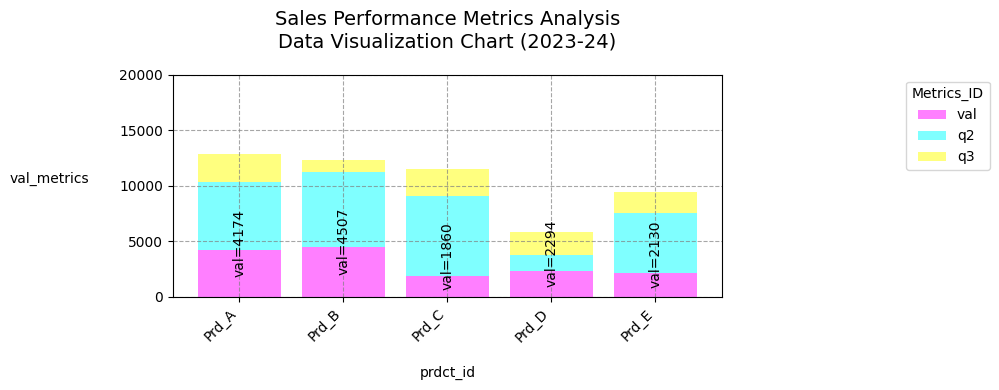

In [24]:
# @title
import numpy as np
import matplotlib.pyplot as plt

# Create sample data
np.random.seed(42)
products = ['Prd_A', 'Prd_B', 'Prd_C', 'Prd_D', 'Prd_E']
values = np.random.randint(1000, 5000, size=5)
q2_vals = np.random.randint(1000, 10000, size=5)
q3_vals = np.random.randint(1000, 3000, size=5)

plt.figure(figsize=(12, 4))

# Stacked bars with poor color choices
plt.bar(products, values, color='#FF00FF', alpha=0.5, label='val')
plt.bar(products, q2_vals, bottom=values, color='#00FFFF', alpha=0.5, label='q2')
plt.bar(products, q3_vals, bottom=values+q2_vals, color='#FFFF00', alpha=0.5, label='q3')

# Bad formatting choices
plt.title('Sales Performance Metrics Analysis\nData Visualization Chart (2023-24)', fontsize=14, pad=20)
plt.ylim(0, 20000)  # Misleading scale
plt.xlabel('prdct_id', labelpad=15)
plt.ylabel('val_metrics', rotation=0, labelpad=50)
plt.xticks(rotation=45, ha='right')
plt.grid(True, which='both', linestyle='--', color='gray', alpha=0.7)
plt.legend(bbox_to_anchor=(1.5, 1), title='Metrics_ID')

# Cluttered annotations
for i, v in enumerate(values):
    plt.text(i, v/2, f'val={v}', ha='center', rotation=90)

plt.tight_layout()
plt.show()

This chart demonstrates several data visualization **anti-patterns**

#### Visual Elements Antipatterns
- Clashing, hard-to-read neon colors (#FF00FF, #00FFFF, #FFFF00)
- Excessive transparency (alpha=0.5) making data harder to read
- Distracting grid lines
- Awkward figure dimensions (12,4)

#### Data Representation Anti-Patterns
- Misleading y-axis scale (extends to 20000 when data maxes around 15000)
- Stacked bars without clear relationship
- Vertical text annotations cluttering the bars

#### Labeling Antipatterns
- Cryptic axis labels ("prdct_id", "val_metrics")
- Poorly positioned y-axis label (rotation=0)
- Overcomplicated title with redundant terms
- Legend positioned far from data (bbox_to_anchor=(1.5, 1))

## Introducing Data Dashboards

A **data dashboard** is an interactive tool that organizes and visualizes key information in a unified interface. Dashboards are particularly useful for decision-making, as they allow users to monitor, analyze, and interact with data in real time. Unlike static charts, dashboards combine multiple visualizations, often with filters and interactivity, so users can drill down into specific aspects of the data.

For Retro Snacks Co., a well-designed dashboard can help answer questions like:
- How are sales trending across regions and products?
- Which sales channels are the most profitable?
- What is the relationship between marketing spend and customer ratings?

Dashboards excel at presenting data in a way that is:
1. **Actionable**: Summarizing key metrics like total sales, average customer ratings, and regional performance for decision-makers.
2. **Interactive**: Allowing users to filter data by date range, product, or region to uncover trends.
3. **Integrated**: Consolidating data into a single view, reducing the need to jump between reports.




### Introduction to Plotly Dashboards

Plotly dashboards are implemented using the **Dash framework**, a Python library for building interactive web applications. Dash abstracts much of the complexity of web development, allowing you to focus on data visualization and interactivity.

Here are the key components of a Dash dashboard:

1. **App Initialization**:
   - Dash applications are initialized with `JupyterDash()` or `Dash()` objects. This serves as the foundation for the app.

2. **Layout**:
   - The **layout** defines what the dashboard looks like. It is composed of a hierarchy of UI components like headings, dropdowns, sliders, and charts. These components are provided by the `dash.html` and `dash.dcc` modules:
     - `html.Div` and `html.H1` for structure and text.
     - `dcc.Dropdown`, `dcc.Slider`, and `dcc.DatePickerRange` for user inputs.
     - `dcc.Graph` for displaying visualizations.

3. **Callbacks**:
   - **Callbacks** define the interactivity of the dashboard. They connect user inputs (e.g., dropdowns or sliders) to outputs (e.g., charts or tables). A callback:
     - Listens to inputs using `@app.callback`.
     - Processes the data or visualization based on the inputs.
     - Updates the dashboard outputs dynamically.

4. **Running the Server**:
   - The app runs on a local server. In Jupyter/Colab environments, the `run_server(mode='inline')` function embeds the dashboard directly in the notebook for convenience.

Here’s how these components fit together conceptually:

| **Component**     | **Purpose**                                                                                   | **Example**                                     |
|--------------------|-----------------------------------------------------------------------------------------------|------------------------------------------------|
| `JupyterDash()`    | Initializes the app.                                                                          | `app = JupyterDash(__name__)`                  |
| `html.Div`         | Organizes UI components into containers.                                                     | `html.Div([dcc.Graph(id='graph')])`            |
| `dcc.Dropdown`     | Allows users to select from a list of options.                                                | Product selector: `dcc.Dropdown(id='product')` |
| `dcc.Graph`        | Displays visualizations.                                                                      | Bar chart: `dcc.Graph(id='bar-chart')`         |
| `@app.callback`    | Connects user inputs to dashboard outputs, enabling interactivity.                            | Updates charts when a dropdown value changes.  |
| `run_server()`     | Runs the dashboard in the notebook or browser.                                                | `app.run_server(mode='inline')`                |

---

#### Example Flow for a Dash Dashboard

Let’s walk through a simple example:  
1. **Input**: A dropdown menu allows the user to select a product.  
2. **Callback**: The selection filters the data and recalculates total sales for the chosen product.  
3. **Output**: A bar chart updates dynamically to display the filtered data.

With this understanding, let’s dive into the implementation of a dashboard for Retro Snacks Co.

In [25]:
# @title
mm("""
classDiagram
    %% Main application class
    class DashApp {
        - Layout : Layout
        - Callbacks : Callbacks
        - Server : FlaskServer
        + run_server() : void %% Starts the Dash server
    }

    %% Data source and processing
    class Data {
        - Source : str %% Example sources: CSV, SQL, API
        - Preprocessing : pandas.DataFrame %% Data cleaning and manipulation
        + Filter(criteria) : pandas.DataFrame %% Filters data based on user criteria
        + Aggregate(method) : pandas.DataFrame %% Aggregates data (e.g., sum, average)
    }

    %% Layout structure and visual elements
    class Layout {
        - HTML Components : list %% Basic structure elements (e.g., Div, H1)
        - Core Components : list %% Interactive elements (e.g., Graph, Dropdown)
        + Render() : html.Div %% Combines components into a Dash layout
    }

    %% User interaction and updates
    class Callbacks {
        - Inputs : list %% Inputs (e.g., dropdown selections, date pickers)
        - Outputs : list %% Outputs (e.g., graphs, KPIs)
        - Interactivity : dict %% Mapping between inputs and outputs
        + UpdateVisualizations() : dict %% Updates outputs based on inputs
    }

    %% Relationships
    DashApp --> Data : Uses %% The app queries data for visualizations
    DashApp --> Layout : Defines %% Defines the structure and visual elements
    DashApp --> Callbacks : Implements %% Implements interactivity and logic
    Layout --> Callbacks : Links Components %% Links user inputs to dynamic updates
    Layout --> Data : Fetches Data %% Retrieves data to populate visualizations

""")

#### Step 1. Install Necessary Libraries
Ensure you have the required libraries installed in your Colab or Jupyter environment:


In [26]:
# !pip install plotly # already installed
!pip install dash -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 15.7 MB/s eta 0:00:00


#### Step 2. Create a Simple Dashboard

Below is an example of a dashboard displaying:
- A bar chart for total sales by product.
- A pie chart for sales share by region.
- Filters for selecting a date range and products.


In [27]:
import pandas as pd
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

# Initialize the app
app = Dash(__name__)

# Layout of the dashboard
app.layout = html.Div([
    html.H1("Retro Snacks Co. Dashboard", style={'text-align': 'center'}),

    # Filters
    html.Div([
        html.Label("Select Date Range:"),
        dcc.DatePickerRange(
            id='date-picker',
            start_date=df['Date'].min(),
            end_date=df['Date'].max(),
            display_format='YYYY-MM-DD'
        ),
        html.Label("Select Products:"),
        dcc.Dropdown(
            id='product-dropdown',
            options=[{'label': product, 'value': product} for product in df['Product'].unique()],
            value=df['Product'].unique(),
            multi=True
        ),
    ], style={'margin-bottom': '20px'}),

    # Visualizations
    html.Div([
        dcc.Graph(id='bar-chart'),
        dcc.Graph(id='pie-chart'),
    ]),
])

# Callbacks to update the charts
@app.callback(
    [Output('bar-chart', 'figure'), Output('pie-chart', 'figure')],
    [Input('date-picker', 'start_date'), Input('date-picker', 'end_date'), Input('product-dropdown', 'value')]
)
def update_charts(start_date, end_date, selected_products):
    # Filter data based on user inputs
    filtered_data = df[
        (df['Date'] >= start_date) &
        (df['Date'] <= end_date) &
        (df['Product'].isin(selected_products))
    ]

    # Bar chart for total sales by product
    bar_fig = px.bar(
        filtered_data.groupby('Product')['Sales Volume'].sum().reset_index(),
        x='Product',
        y='Sales Volume',
        title='Total Sales by Product',
        labels={'Sales Volume': 'Total Sales Volume', 'Product': 'Product'}
    )

    # Pie chart for sales share by region
    pie_fig = px.pie(
        filtered_data.groupby('Region')['Sales Volume'].sum().reset_index(),
        names='Region',
        values='Sales Volume',
        title='Sales Share by Region'
    )

    return bar_fig, pie_fig

# Run the app inline in Jupyter/Colab
from IPython.display import display

app.run_server(mode='inline')


<IPython.core.display.Javascript object>

### What This Dashboard Achieves

This dashboard provides a consolidated view of Retro Snacks Co.’s performance, with real-time interactivity. Users can:
- Select specific time frames to identify seasonal trends.
- Filter by products to compare their performance.
- Understand regional sales dynamics with the pie chart.

As we expand, this framework can incorporate additional charts, KPIs, or even machine learning predictions to enhance decision-making. Dash’s flexibility ensures we can tailor the dashboard to meet the evolving needs of Retro Snacks Co.

## Types of Dashboards, Their Stakeholders, and Design Considerations

Dashboards are tailored tools that consolidate data into a visually interactive format, serving the unique needs of different stakeholders. While all dashboards provide insights, their design and content vary significantly depending on their purpose. Three primary types of dashboards are operational, analytical, and strategic, each addressing specific questions and demands from their intended audience.

### Operational Dashboards

Operational dashboards focus on **real-time monitoring of activities and processes**. They are essential for teams that need to respond quickly to changes, such as customer support handling incoming tickets or operations teams managing inventory levels. For Retro Snacks Co., an operational dashboard might track live sales volume, daily order completions, and regional performance.

Operational dashboards prioritize **speed and clarity**. Live data updates ensure that users are always viewing the most current information. Key metrics, such as sales volume or customer complaints, are displayed as **KPIs**—simple, direct indicators that show performance at a glance. Visualizations like **line charts** for trends or **gauges** for status indicators work well, as they are easy to interpret quickly.

For design, simplicity reigns supreme. The dashboard should highlight actionable insights, with visual or color-coded alerts to signal deviations from expected performance. Filters for drilling into specific regions or timeframes can add flexibility without overloading users.

**Key Features:**
- Live updates to track performance.
- Simple KPIs and visual alerts for immediate understanding.
- Filters for drilling into regional or temporal data.

### Analytical Dashboards

Analytical dashboards delve into the **exploration of data**, helping users uncover patterns, correlations, and trends. These dashboards serve data analysts, product managers, and other decision-makers who rely on detailed insights to inform strategy. Unlike operational dashboards, which prioritize live updates, analytical dashboards emphasize interactivity and depth.

At Retro Snacks Co., an analytical dashboard might reveal correlations between marketing spend and sales or compare customer ratings across products. Users could interact with **scatter plots**, **heatmaps**, and **bubble charts** to explore relationships between variables. Time-series data could be presented alongside hierarchical visualizations like **treemaps** to identify product performance by region.

Effective design for analytical dashboards balances complexity and usability. While the dashboard may contain multiple visualizations, a well-organized layout prevents it from becoming overwhelming. Filters and hoverable tooltips are essential for allowing users to customize views and access deeper layers of information.

| **Analytical Dashboard Example**        | **Design Choice**              |
|-----------------------------------------|---------------------------------|
| Compare marketing spend vs. sales       | Use an interactive scatter plot.|
| Identify sales volume by region over time| Heatmap with time-based filters.|
| Drill into product performance metrics  | Add filters for product and region.|


### Strategic Dashboards

Strategic dashboards provide **high-level insights for long-term decision-making**. Designed for executives and leadership teams, these dashboards summarize performance against key objectives, such as quarterly revenue targets, profit margins, or market share.

For Retro Snacks Co., a strategic dashboard might show how each product line contributes to overall revenue or whether regional sales are meeting forecasts. Strategic dashboards use visualizations like **bar charts**, **gauges**, or **pie charts**, which present aggregated data in a concise and visually engaging manner.

Clarity and focus are critical in strategic dashboards. They typically feature only a few key metrics, prominently displayed with explanatory annotations or comparisons against benchmarks. The visual design often incorporates company branding and maintains a polished, professional look.

**Key Features:**
- Summarized KPIs (e.g., total revenue, profit margin).
- Visual comparisons of performance vs. targets.
- Polished design with minimal distractions.

### Summary Table

| **Dashboard Type**  | **Audience**           | **Purpose**                     | **Example for Retro Snacks Co.**                 |
|----------------------|------------------------|----------------------------------|--------------------------------------------------|
| Operational          | Managers, support staff| Real-time monitoring             | Track daily sales and inventory levels.          |
| Analytical           | Analysts, product teams| Explore patterns and relationships| Compare customer ratings vs. sales by product.   |
| Strategic            | Executives, leadership| Summarize long-term performance  | Show regional contributions to revenue.          |

### Design Choices and Stakeholder Alignment

The type of dashboard you create directly impacts its design. Operational dashboards focus on speed and actionability, while analytical dashboards emphasize interactivity and exploration. Strategic dashboards condense complex data into high-level insights. By aligning dashboards with stakeholder needs, Retro Snacks Co. can ensure that everyone, from front-line managers to executives, has the tools to make informed decisions.

In [28]:
# @title
mm("""
mindmap
    root(Dashboards)
        Operational
            Real-time Data
            Alerts and Notifications
            Daily KPIs
        Analytical
            Trends and Patterns
            Predictive Models
            Interactive Filters
        Strategic
            High-Level Metrics
            Goal Tracking
            Executive Reports
""")

### Designing, Implementing, and Maintaining Dashboards

Creating effective dashboards is a multi-step process that requires careful planning, thoughtful implementation, and ongoing maintenance. Dashboards must be visually appealing, functional, and tailored to the needs of their users. For Retro Snacks Co., the journey from concept to deployment involves design principles, technical implementation, and strategies for ensuring the dashboard remains relevant over time.


### Design Phase: Laying the Foundation

The design phase focuses on understanding the purpose of the dashboard, identifying its audience, and planning its structure. A successful dashboard starts with clear goals and thoughtful user-centric design.

#### 1. Understand Stakeholder Needs  
Before creating a dashboard, it's crucial to understand what the users need from it. Stakeholders, such as managers, analysts, or executives, will have different priorities:
- **Managers**: Need real-time insights into daily operations.
- **Analysts**: Require detailed, exploratory views of the data.
- **Executives**: Want high-level summaries aligned with strategic goals.

Conducting interviews or surveys with stakeholders can help define the key questions the dashboard must answer, such as “Which region is underperforming?” or “What is the ROI of recent marketing campaigns?”

#### 2. Define Key Metrics and Data Sources  
Identify the **KPIs** (Key Performance Indicators) and metrics that are most relevant to the dashboard's purpose. For Retro Snacks Co., this might include:
- Total sales by product and region.
- Average customer ratings by product line.
- Marketing spend and its impact on sales.

Ensure these metrics are supported by reliable data sources, such as SQL databases, CSV files, or APIs.

#### 3. Create Wireframes  
Wireframes are simple, low-fidelity designs that sketch out the layout and structure of the dashboard. They help visualize where elements like filters, charts, and KPIs will be placed. Tools like **Figma**, **Adobe XD**, or even hand-drawn sketches can be used to design wireframes.

**Example Wireframe for Retro Snacks Co.:**
- Top row: KPIs (Total Sales, Average Profit Margin, Customer Satisfaction).
- Middle row: Bar chart for sales by product and pie chart for sales by region.
- Bottom row: Line chart for sales trends over time.

#### 4. Choose the Right Visualizations  
Select chart types that align with the data and the questions being answered. Refer back to the visualizations covered earlier to match the visualization style to the metric being displayed.


### Implementation Phase: Building the Dashboard

With a solid design plan in place, the next step is to implement the dashboard using a tool like **Plotly Dash** or other dashboarding platforms.

#### 1. Prepare and Clean the Data  
Ensure the data is clean, well-structured, and stored in an accessible format. Data should be pre-aggregated or processed if needed to improve dashboard performance. Tools like **pandas** in Python can help clean and format data efficiently.

#### 2. Develop the Dashboard  
Using a framework like **Dash**, start by implementing the layout and adding interactivity. Begin with static visualizations, and then gradually incorporate user inputs like dropdowns, date pickers, and filters.

**Example Workflow:**
- Create a layout with placeholders for all visualizations.
- Add callbacks to update visualizations dynamically based on user input.
- Test interactivity and responsiveness to ensure the dashboard behaves as expected.

#### 3. Test with Stakeholders  
Before deployment, test the dashboard with end users to ensure it meets their needs. Gather feedback on usability, data accuracy, and whether it answers the intended questions.


### Maintenance Phase: Keeping Dashboards Relevant

Dashboards require regular updates to remain functional and useful. Over time, changes in business needs, data sources, or user preferences may necessitate adjustments.

#### 1. Monitor Performance and Usage  
Track how users interact with the dashboard. Are certain filters rarely used? Are certain charts loading slowly? Tools like **Google Analytics for Dashboards** can provide insights into usage patterns.

#### 2. Update for Changing Requirements  
As business needs evolve, the dashboard must evolve too. Add new metrics or visualizations as necessary, and retire features that are no longer relevant. For Retro Snacks Co., this might involve incorporating new product lines or updating KPIs based on new company goals.

#### 3. Ensure Data Accuracy and Reliability  
Dashboards are only as good as the data they display. Regularly audit the data pipelines and sources to ensure that the information presented is accurate and up to date.

#### 4. Gather Feedback Regularly  
Engage with stakeholders periodically to assess whether the dashboard is meeting their needs. Their feedback can guide incremental improvements.

### Summary of Processes

| **Phase**            | **Steps**                                                                                     | **Tools/Considerations**                       |
|-----------------------|-----------------------------------------------------------------------------------------------|-----------------------------------------------|
| **Design**            | Define goals, identify metrics, and create wireframes.                                        | Stakeholder interviews, Figma, hand sketches. |
| **Implementation**    | Prepare data, build the dashboard, and test with stakeholders.                                | Plotly Dash, pandas, Python.                  |
| **Maintenance**       | Monitor usage, update features, and ensure data accuracy.                                     | Feedback loops, analytics tools.              |

By following a structured process of design, implementation, and maintenance, Retro Snacks Co. can ensure its dashboards are not only visually appealing but also effective tools for decision-making. From wireframes to live deployments, each phase contributes to a dashboard that stakeholders trust and rely on for actionable insights.

### Graphic: Designing and Implementing Dashboards

In [29]:
# @title
mm("""
flowchart TD
    %% Start of the process
    A[Understand Stakeholder Needs]:::step -->|Collaborate with stakeholders| B[Identify Key Metrics and Data Sources]:::step
    B -->|Ensure data relevance| C[Create Wireframes and Prototypes]:::step
    C -->|Gather stakeholder feedback| D[Develop Minimum Viable Dashboard - MVD]:::step
    D -->|Iterate based on feedback| E[Test Dashboard with Stakeholders]:::step
    E -->|Refine design and interactivity| F[Implement Full Dashboard Features]:::step
    F -->|Deploy for use| G[Deploy Dashboard]:::step
    G -->|Monitor usage patterns| H[Gather Feedback and Iterate]:::step
    H -->|Refine KPIs and add new features| D


    %% Styling
    classDef step fill:#d9e8fb,stroke:#0366fc,stroke-width:2px,rx:5px,ry:5px,font-size:14px;
""")

### Conclusion: Mastering Visualizations and Dashboards with Plotly

Visualizations and dashboards are indispensable tools for turning raw data into actionable insights. For Retro Snacks Co., the ability to track sales trends, explore customer preferences, and monitor regional performance is essential for staying competitive in a dynamic market. By leveraging the power of Plotly, we gain access to a flexible, interactive, and visually stunning framework for creating these tools.

This chapter explored the foundations of effective data visualization, covering a wide range of chart types from bar charts to treemaps, bubble charts, and heatmaps. Each visualization type serves a distinct purpose, whether it’s highlighting trends over time, uncovering correlations, or breaking down hierarchies. With clear examples, we demonstrated how to select the right chart for the data and question at hand, avoiding common pitfalls and ensuring clarity.

Dashboards elevate visualizations by bringing them together into an integrated, interactive interface. We explored how different dashboard types—operational, analytical, and strategic—serve the unique needs of managers, analysts, and executives. Through Plotly Dash, we created a live, dynamic dashboard that combines filters, interactive charts, and user-friendly layouts. This framework not only consolidates critical metrics but also allows users to drill into the details that matter most to them.

The process of designing and maintaining dashboards requires care at every stage. From creating wireframes and aligning with stakeholder needs to building and iterating on the dashboard, the emphasis remains on clarity, usability, and reliability. With tools like Plotly and Python libraries such as `pandas`, we have a powerful ecosystem for managing data and transforming it into compelling stories.

By mastering visualizations, dashboards, and tools like Plotly, Retro Snacks Co. is poised to make data-driven decisions that drive growth and innovation. These skills are not only critical for managing today’s business challenges but also for building a culture of insight and action, ensuring success in the long term.

In [30]:
%%html
<iframe src="https://quizlet.com/973359871/learn/embed?i=psvlh&x=1jj1" height="500" width="100%" style="border:0"></iframe>

## Glossary
| **Term** | **Definition** |
| --- | --- |
| **Bar chart** | A visual representation of data using rectangular bars where the length of each bar is proportional to the value it represents. Bars can be vertical or horizontal. |
| **Bubble chart** | A type of chart that displays data as bubbles where the size of each bubble represents an additional dimension of the data, typically used to show relationships between variables. |
| **Choropleth** | A type of map where areas are shaded or colored in proportion to the value of the variable being represented, typically used to display geographical data. |
| **Continuous/Live data** | Data that is constantly updated in real-time, reflecting ongoing changes and allowing dynamic visualization or analysis. |
| **Data dashboard** | A centralized visual interface that presents key metrics and data points, often in real-time, allowing for quick insights and decision-making. |
| **Dimensions** | Descriptive attributes or characteristics of data, often used in analysis to segment and filter data sets. Typically non-numerical. |
| **End-user** | The person or group who ultimately uses a product or service, particularly in a software or data environment, often a consumer or operator. |
| **Fields** | Individual columns in a data set or database, each representing a single type of data, such as names, dates, or values. |
| **Heatmap** | A graphical representation of data where values are depicted by color, often used to show the intensity or frequency of data points in a specific area. |
| **Histogram** | A chart that represents the distribution of numerical data by dividing it into intervals (bins) and displaying the frequency of values in each bin as a bar. |
| **import plotly.express as px** | A Python command that imports the Plotly Express library, allowing for the creation of simple, declarative visualizations with minimal code. |
| **Information hierarchy** | The organization of data or content in a structured way to prioritize what is most important, guiding users' focus and understanding. |
| **Intuitive Design** | A design approach where the interface or product is easy to use and understand without requiring significant explanation or learning. |
| **Line chart** | A graph that displays data points connected by a continuous line, often used to show trends over time. |
| **Measures** | Numerical data used in analysis, representing quantities, sums, averages, or other calculations typically derived from dimensions. |
| **Mockup/Wireframe** | A visual prototype or rough sketch of a design layout, used to plan and communicate the structure and functionality of a system before full development. |
| **Narrative** | The story or explanation that connects data points, charts, or visualizations to provide context and meaning for the audience. |
| **Pie chart** | A circular chart divided into segments, with each segment representing a proportion of the whole, often used to show percentages or parts of a total. |
| **Plotly** | An open-source data visualization library in Python that allows the creation of interactive graphs and plots, often used for complex data analysis and presentation. |
| **Production environment** | The final deployment setting where a system, application, or data solution is made accessible to the end-users and must function correctly under real-world conditions. |
| **Px.area(data_frame, x, y, ...)** | A Plotly Express function that creates an area chart. Important arguments include `data_frame` (the data), `x` (column for x-axis, usually a time or category), and `y` (column for y-axis, representing a value to be filled). |
| **Px.bar(data_frame, x, y, ...)** | A Plotly Express function that generates a bar chart. Key arguments include `data_frame` (the data), `x` (categories or labels on the x-axis), `y` (numeric values for the bars). Optional arguments: `color`, `orientation`. |
| **px.chart_type(data_frame, x, y, ...)** | The generic syntax for Plotly Express charts. Replace `chart_type` with specific types like `line`, `scatter`, `pie`, etc. Core arguments include `data_frame` (the data), `x` (x-axis), and `y` (y-axis). |
| **Px.choropleth(data_frame, locations, color, ...)** | A Plotly Express function that creates a choropleth map. Key arguments include `data_frame` (the data), `locations` (geographical locations), `color` (numeric or categorical variable mapped to color). |
| **Px.histogram(data_frame, x, ...)** | A Plotly Express function that creates a histogram. The main argument is `x` (column representing the data to be binned), with optional arguments like `nbins` (number of bins) and `color`. |
| **Px.imshow(img_array, ...)** | A Plotly Express function that visualizes image-like data such as heatmaps or matrices. Core arguments include `img_array` (the array or image data). Optional: `color_continuous_scale` and `aspect_ratio`. |
| **px.line(data_frame, x, y, ...)** | A Plotly Express function that creates a line chart. Key arguments include `data_frame` (the data), `x` (x-axis, often time or categories), `y` (numeric data for the y-axis). Optional: `line_shape`, `markers`. |
| **Px.pie(data_frame, names, values, ...)** | A Plotly Express function that creates a pie chart. Important arguments include `data_frame` (the data), `names` (labels for slices), and `values` (corresponding values). Optional: `hover_data`, `color`. |
| **Px.scatter(data_frame, x, y, ...)** | A Plotly Express function that generates a scatter plot. Core arguments include `data_frame` (the data), `x` (x-axis values), and `y` (y-axis values). Optional: `color`, `size`, `symbol`. |
| **Px.scatter(data_frame, x, y, size, color, ...)** | A more advanced scatter plot where `size` adjusts the marker size based on a third variable, and `color` differentiates points based on a categorical or continuous variable. |
| **px.treemap(data_frame, path, values, ...)** | A Plotly Express function that generates a tree map. Key arguments include `data_frame` (the data), `path` (categorical groupings), and `values` (size of rectangles). Optional: `color`, `hover_data`. |
| **Scatter plot** | A chart that uses dots to represent the values of two variables, often used to identify relationships, patterns, or correlations between the variables. |
| **Stacked chart** | A variation of bar or area charts where the data is stacked on top of each other, showing the cumulative total while also displaying the contribution of each individual part. |
| **Static Data** | Data that does not change or update after being recorded or loaded, typically used in situations where historical information is analyzed. |
| **Tree Map** | A chart that represents hierarchical data as nested rectangles, where the size of each rectangle corresponds to a quantitative variable, and nested levels show categorical groupings. |
| **User guide** | A document or resource designed to help end-users understand how to use a product, service, or system, typically containing step-by-step instructions and explanations. |
| **User testing** | The process of evaluating a product or system by having real users interact with it to identify usability issues, areas for improvement, and to validate whether it meets user needs. |
| **Waterfall chart** | A type of bar chart that shows the cumulative effect of sequentially added positive and negative values, often used to demonstrate how a starting value is impacted by various intermediate steps to reach an end value. |
| **Word cloud** | A visual representation of text data where the frequency or importance of each word determines its size in the cloud, often used to depict word frequency in a text dataset. |
| **WordCloud(...).generate(text)** | A Python function from the WordCloud library that generates a word cloud from a given text input. |